In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
df = pd.read_csv('Messages.csv', index_col=0)
print(df)

                     Message Date       Delivered Date            Read Date   
Chat Session                                                                  
jaya wet      2021-11-14 21:30:25  2021-11-14 21:30:25                  NaN  \
jaya wet      2021-11-14 21:30:31  2021-11-14 21:30:31                  NaN   
jaya wet      2021-11-14 21:32:23                  NaN  2021-11-14 21:32:43   
jaya wet      2021-11-14 21:32:30                  NaN  2021-11-14 21:32:43   
jaya wet      2021-11-14 21:32:53  2021-11-14 21:32:53                  NaN   
...                           ...                  ...                  ...   
jaya wet      2023-08-03 09:52:55  2023-08-03 09:52:56                  NaN   
jaya wet      2023-08-03 09:53:07  2023-08-03 09:53:07                  NaN   
jaya wet      2023-08-03 09:54:53  2023-08-03 09:54:53                  NaN   
jaya wet      2023-08-03 09:54:57  2023-08-03 09:54:58                  NaN   
jaya wet      2023-08-03 09:55:06                  N

In [33]:
sentby_nick = df[df['Type'] == 'Outgoing']
sentby_jaya = df[df['Type'] == 'Incoming']

print("amt of texts from jaya: " + str(len(sentby_jaya)))
print("amt of texts from nick: " + str(len(sentby_nick)))

amt of texts from jaya: 52664
amt of texts from nick: 55443


In [34]:

def compare_text(s):
    nick_messages_list = sentby_nick['Text']
    jaya_messages_list = sentby_jaya['Text']

    j_count, n_count = 0, 0
    for j_text in jaya_messages_list:
        if s in str(j_text):
            j_count += 1

    for n_text in nick_messages_list:
        if s in str(n_text):
            n_count += 1

    return j_count, n_count

In [35]:
comp_str = ["love", "sex", "hot", "jaya", "poop", "shut up", "alone", "coming", "leaving", "way"]

for s in comp_str:
    j, n = compare_text(s)
    print("jaya's score of " + s + ": " + str(j))
    print("nick's score of " + s + ": " + str(n))
    print("combined: " + str(j + n))

jaya's score of love: 1171
nick's score of love: 1073
combined: 2244
jaya's score of sex: 124
nick's score of sex: 109
combined: 233
jaya's score of hot: 163
nick's score of hot: 236
combined: 399
jaya's score of jaya: 137
nick's score of jaya: 2711
combined: 2848
jaya's score of poop: 41
nick's score of poop: 60
combined: 101
jaya's score of shut up: 59
nick's score of shut up: 7
combined: 66
jaya's score of alone: 53
nick's score of alone: 43
combined: 96
jaya's score of coming: 120
nick's score of coming: 164
combined: 284
jaya's score of leaving: 130
nick's score of leaving: 153
combined: 283
jaya's score of way: 708
nick's score of way: 476
combined: 1184


In [36]:
# get the most frequent month ???

MessageDates = df['Message Date']
print(type(MessageDates[0]))
print(MessageDates[0])
split_str = MessageDates[0].split("-")
year, month = split_str[0], split_str[1]

month_dic = {}

for date_str in MessageDates:
    split_str = date_str.split("-")
    (year, month) = split_str[0], split_str[1]
    if (year, month) in month_dic:
        month_dic[(year, month)] += 1
    else:
        month_dic[(year, month)] = 1
        [print(year, month)]

    
 

<class 'str'>
2021-11-14 21:30:25
2021 11
2021 12
2022 01
2022 02
2022 03
2022 05
2022 06
2022 07
2022 08
2022 09
2022 10
2022 11
2022 12
2023 01
2023 02
2023 03
2023 04
2023 05
2023 06
2023 07
2023 08


In [37]:
amt_list = list()
for key in month_dic:
    amt_list.append(month_dic[key])

print(amt_list)


[4452, 9694, 6260, 4766, 2390, 1907, 6647, 5658, 4235, 6234, 6254, 5500, 6245, 6240, 4909, 4847, 4254, 4307, 6892, 6138, 278]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


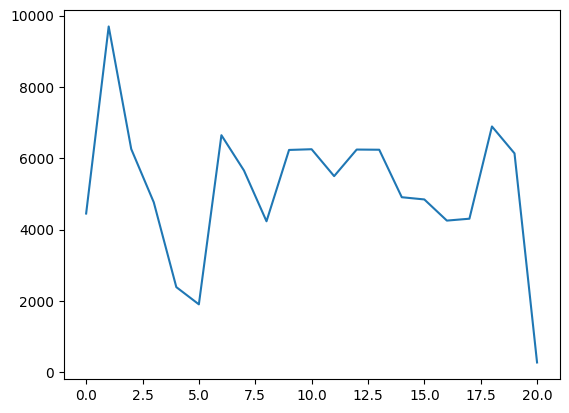

In [38]:
xs = np.arange(len(amt_list))
print(xs)

plt.plot(xs, amt_list)

In [39]:
def find_freq_per_month(word):
    MessageDates = df['Message Date']
    Texts = df['Text']
    split_str = MessageDates[0].split("-")
    year, month = split_str[0], split_str[1]

    month_dic = {}

    for i, date_str in enumerate(MessageDates):
        split_str = date_str.split("-")
        (year, month) = split_str[0], split_str[1]
        if word in str(Texts[i]):
            if (year, month) in month_dic:
                month_dic[(year, month)] += 1
            else:
                month_dic[(year, month)] = 1
    
    return month_dic

In [40]:
# ideas
# fequencies of things we say
# first text "i just have you on my phone"

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '11, 2021'),
  Text(1, 0, '12, 2021'),
  Text(2, 0, '01, 2022'),
  Text(3, 0, '02, 2022'),
  Text(4, 0, '03, 2022'),
  Text(5, 0, '05, 2022'),
  Text(6, 0, '07, 2022'),
  Text(7, 0, '08, 2022'),
  Text(8, 0, '09, 2022'),
  Text(9, 0, '10, 2022'),
  Text(10, 0, '11, 2022'),
  Text(11, 0, '01, 2023'),
  Text(12, 0, '02, 2023')])

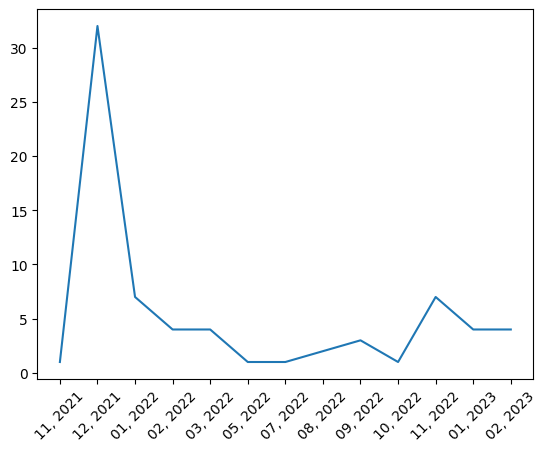

In [41]:
dic = find_freq_per_month("covid")
key_list = list()
amt_list = list(dic.values())
for key in dic:
    year, month = key
    key_list.append(str((month) + ", " + str(year)))

xs = np.arange(len(amt_list))

plt.plot(key_list, amt_list)
plt.xticks(rotation=45)


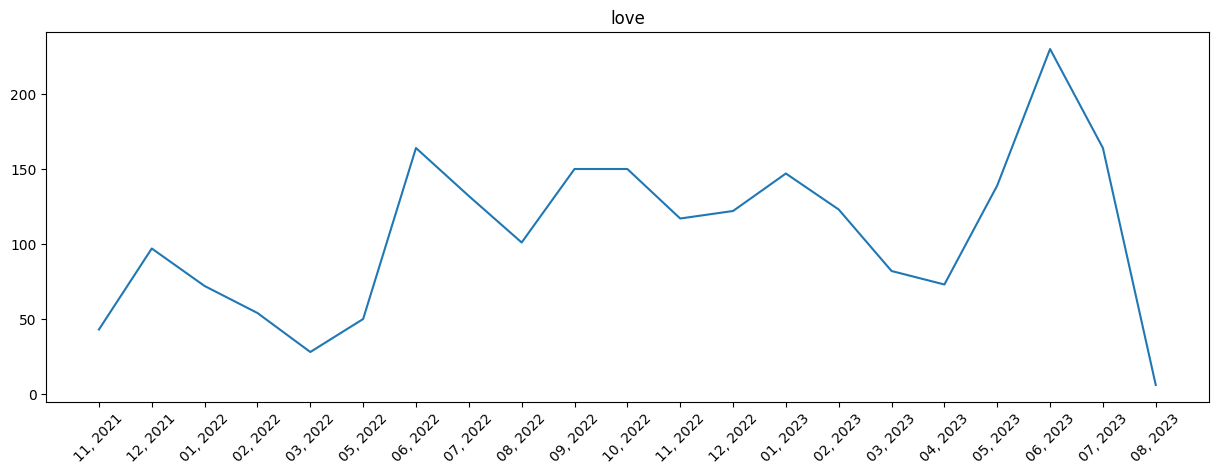

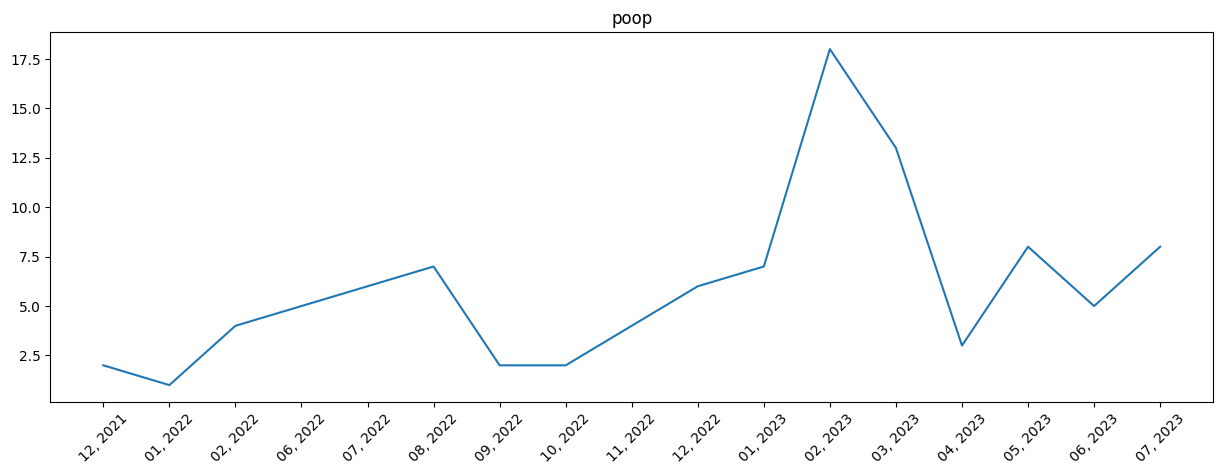

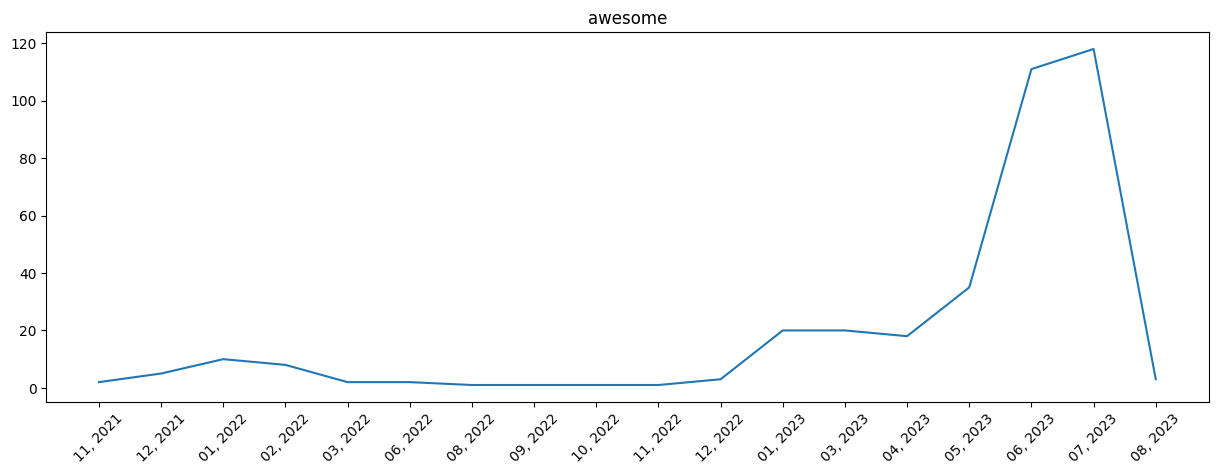

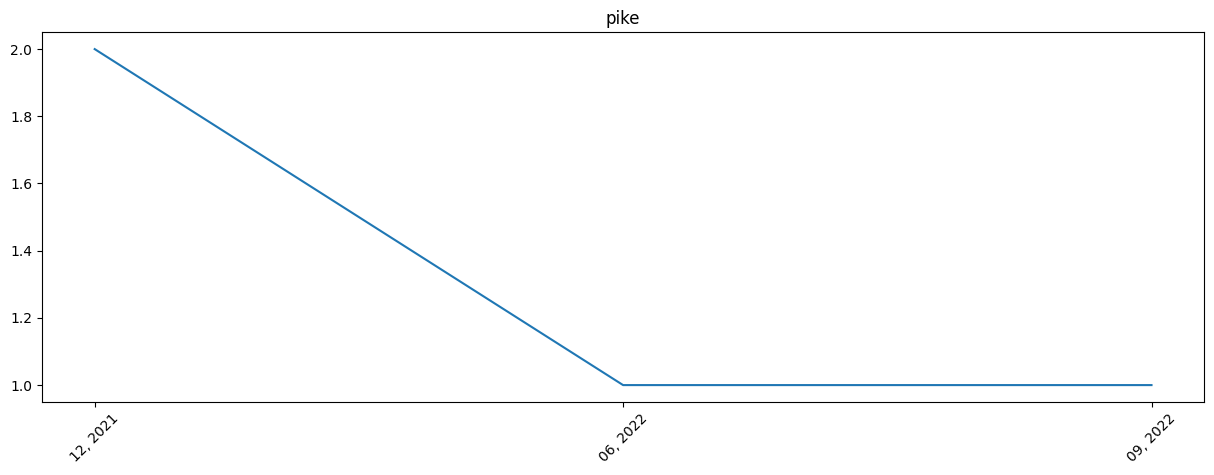

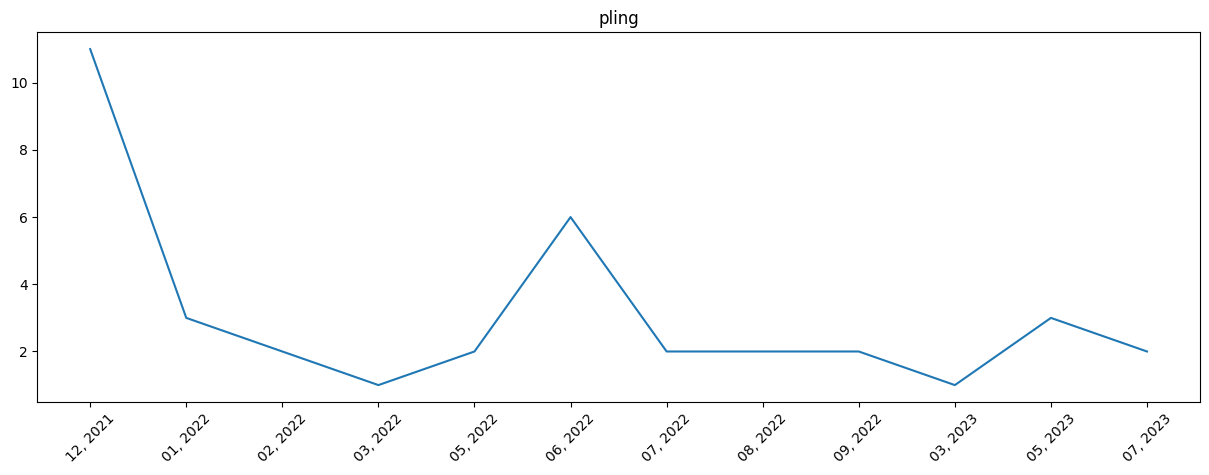

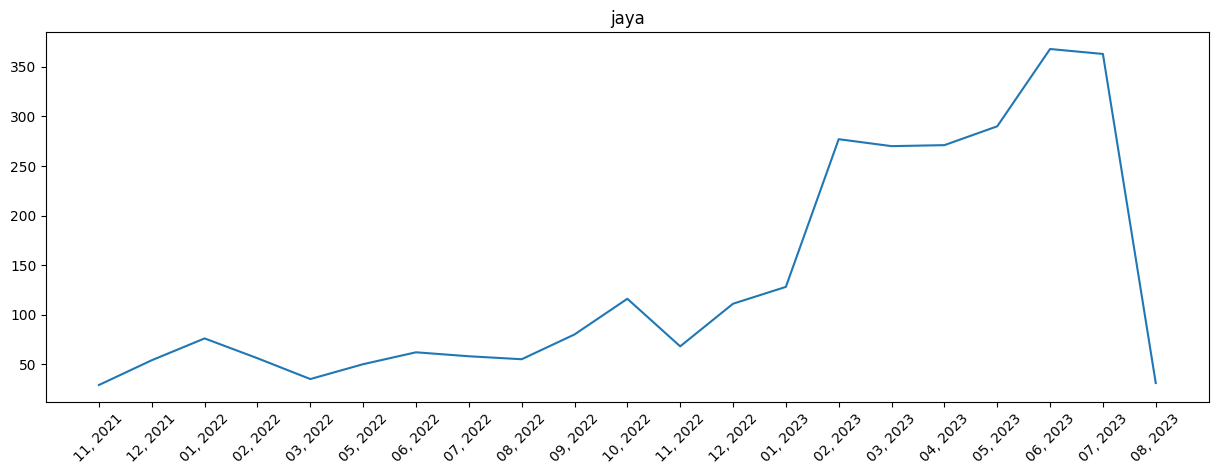

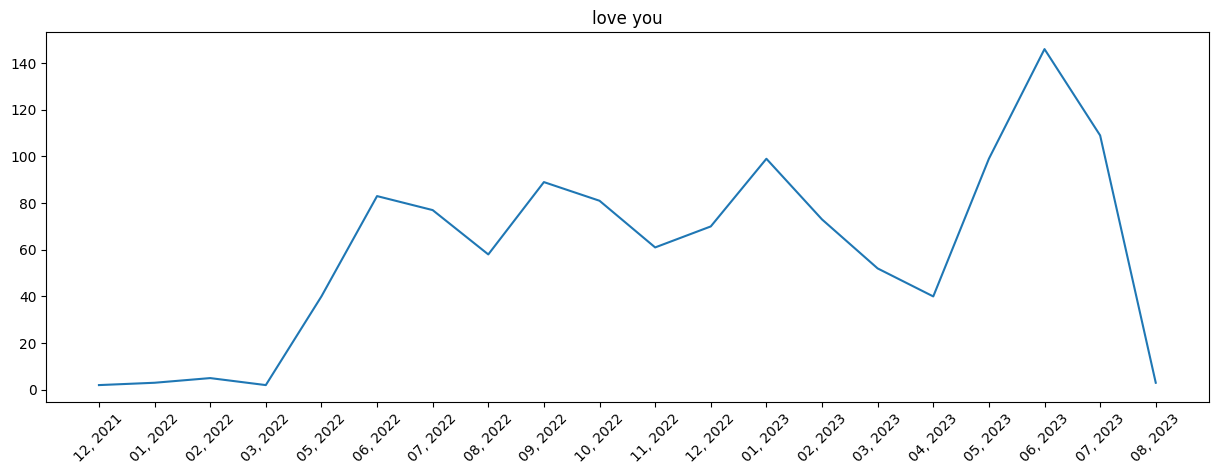

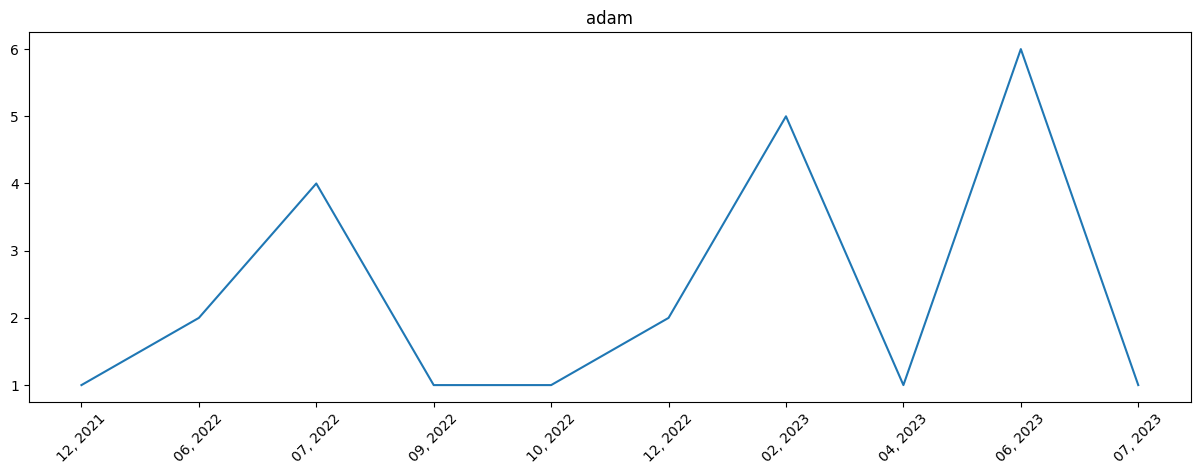

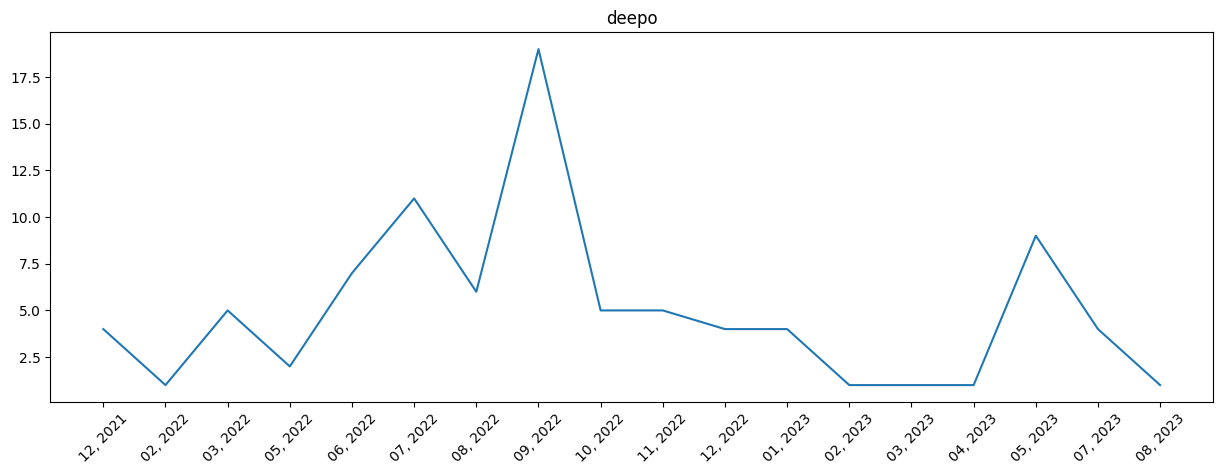

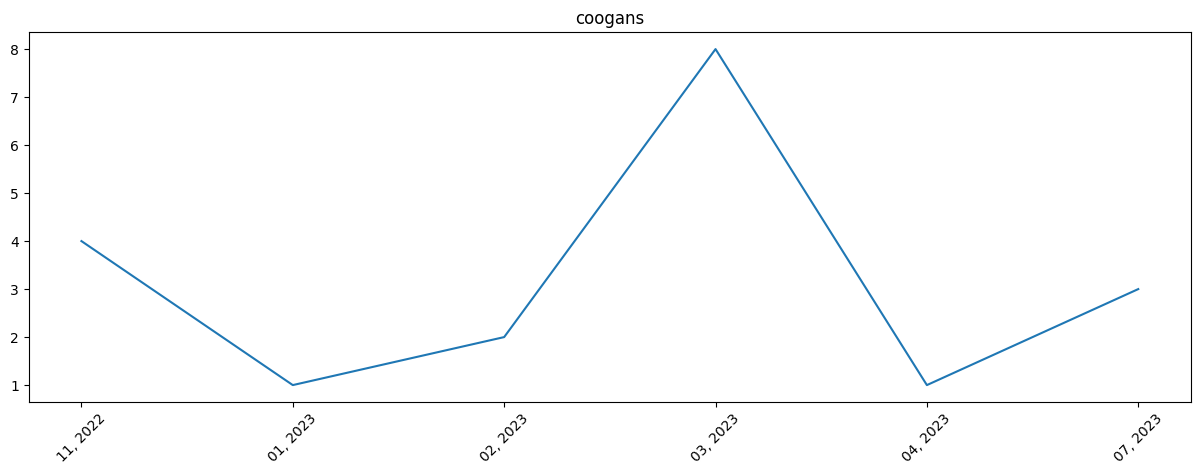

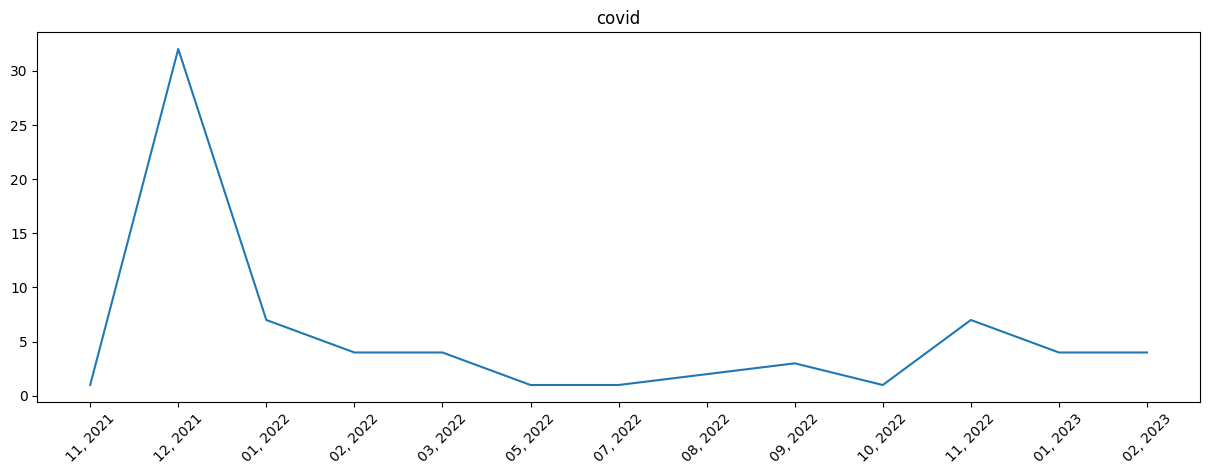

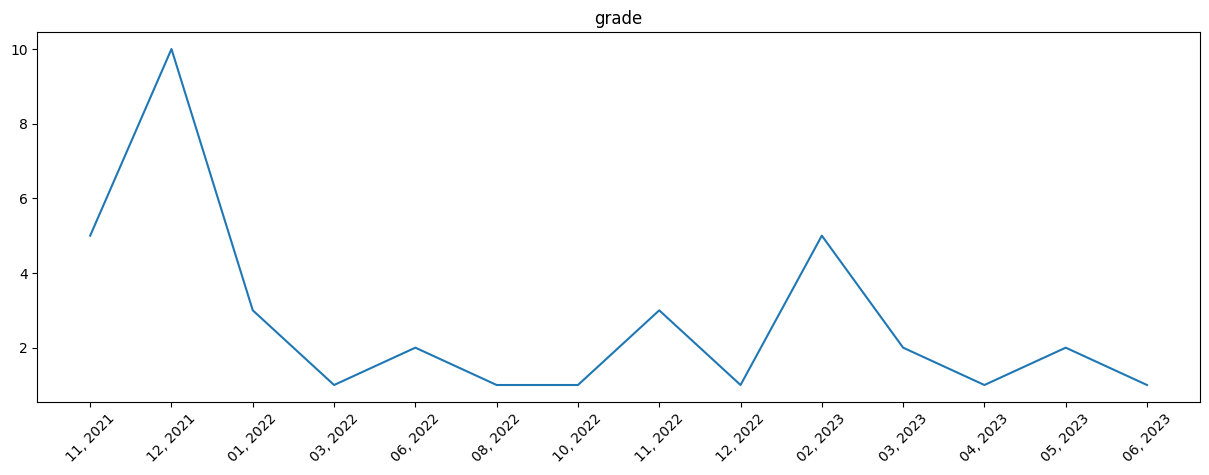

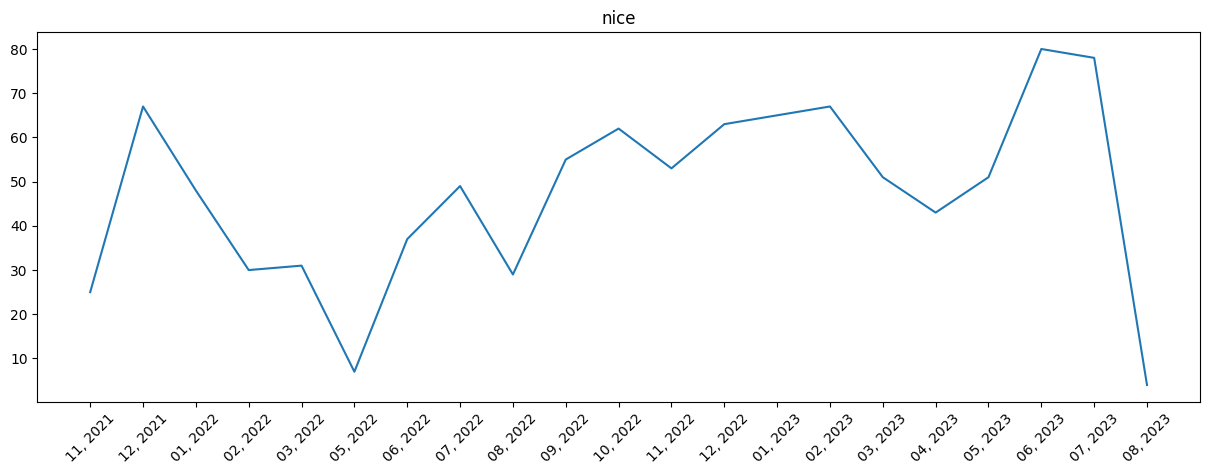

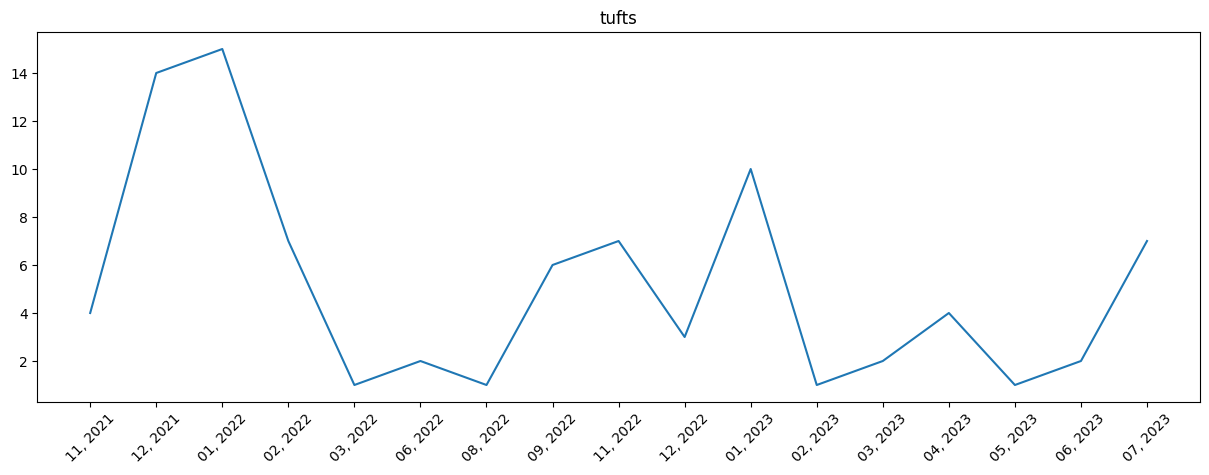

In [74]:
words = ["love", "poop", "awesome", "pike", "pling", "jaya", "love you", "adam", "deepo", "coogans", "covid", "grade", "nice", "tufts"]
for w in words:
    dic = find_freq_per_month(w)
    amt_list = list(dic.values())
    key_list = list()
    for key in dic:
        year, month = key
        key_list.append(str((month) + ", " + str(year)))

    plt.plot(key_list, amt_list)
    plt.xticks(rotation=45)
    plt.title(w)
    fig1 = plt.gcf()
    fig1.set_figwidth(15)
    fig1.savefig('./imgs/' + w + '.png', bbox_inches='tight')
    plt.show()


In [65]:
DatesCol = df["Message Date"]
print(DatesCol[0])
hour_dic = {}

for date in DatesCol:
    time = date.split(" ")[1]
    hour = time.split(":")[0]

    if hour in hour_dic:
        hour_dic[hour] += 1
    else:
        hour_dic[hour] = 1
print(hour_dic)
key_list = list()
amt_list = list()

for i in range(1, 24):
    if i < 10:
        i = '0' + str(i)

    key_list.append(i)
    amt_list.append(hour_dic[str(i)])
    print(str(i) + ": " + str(hour_dic[str(i)]))

2021-11-14 21:30:25
{'21': 6845, '22': 7396, '08': 1665, '13': 7001, '14': 7566, '15': 7015, '16': 8525, '20': 6561, '23': 6349, '09': 3610, '10': 5404, '11': 6601, '12': 6383, '17': 7468, '18': 6621, '19': 7034, '07': 616, '00': 2539, '01': 1337, '02': 610, '06': 242, '03': 245, '04': 318, '05': 156}
01: 1337
02: 610
03: 245
04: 318
05: 156
06: 242
07: 616
08: 1665
09: 3610
10: 5404
11: 6601
12: 6383
13: 7001
14: 7566
15: 7015
16: 8525
17: 7468
18: 6621
19: 7034
20: 6561
21: 6845
22: 7396
23: 6349


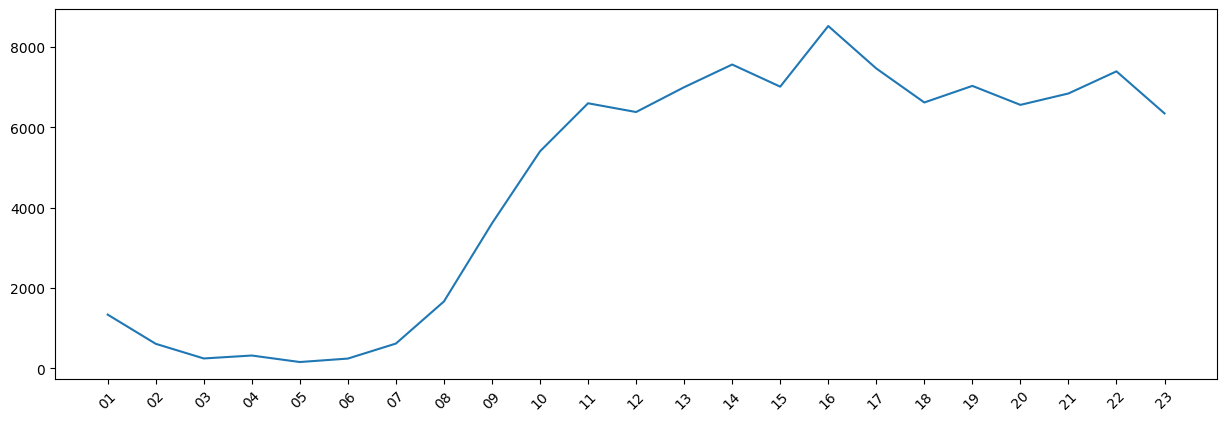

In [68]:
plt.plot(key_list, amt_list)
plt.xticks(rotation=45)
fig1 = plt.gcf()
fig1.set_figwidth(15)
fig1.savefig('./imgs/textingbyhour.png', bbox_inches='tight')
plt.show()